In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import datareader

In [2]:
matplotlib.rcParams['figure.figsize'] = [3,2]

In [3]:
from activities import Activities

In [4]:
sample_frequency = 200 # Hz
chunk_size = 5 # In seconds
seed = 1

## Data reading

In [5]:
used_files = [('data/2018-06-1017.48.48 running last few seconds stair .csv', Activities.RUNNING), ('data/2018-06-1211.41.13 cycling .csv', Activities.CYCLING), ('data/2018-06-1018.05.57 fast running .csv', Activities.RUNNING), ('data/2018-06-1214.23.46 Walking .csv', Activities.WALKING), ('data/2018-06-2012.25.52 sitting.csv', Activities.SITTING), ('data/2018-06-2011.12.35 down stairs.csv', Activities.STAIRS_DOWN), ('data/2018-06-2012.53.55down stairs.csv', Activities.STAIRS_DOWN), ('data/2018-06-2016.19.41down stairs.csv', Activities.STAIRS_DOWN), ('data/2018-06-2016.20.39 walking .csv', Activities.WALKING), ('data/2018-06-2016.25.57cycling.csv', Activities.CYCLING), ('data/2018-06-2113.03.21running.csv', Activities.RUNNING), ('data/2018-06-2213.53.38sitting.csv', Activities.SITTING), ('data/2018-06-2214.56.48stairs down .csv', Activities.STAIRS_DOWN)]
dataset, labels = datareader.get_dataset(used_files, fs = sample_frequency, chunk_size = chunk_size)
dataset = np.array(dataset)
labels = np.array(labels)

data/2018-06-1017.48.48 running last few seconds stair .csv Activities.RUNNING
data/2018-06-1211.41.13 cycling .csv Activities.CYCLING
data/2018-06-1018.05.57 fast running .csv Activities.RUNNING
data/2018-06-1214.23.46 Walking .csv Activities.WALKING
data/2018-06-2012.25.52 sitting.csv Activities.SITTING
data/2018-06-2011.12.35 down stairs.csv Activities.STAIRS_DOWN
data/2018-06-2012.53.55down stairs.csv Activities.STAIRS_DOWN
data/2018-06-2016.19.41down stairs.csv Activities.STAIRS_DOWN
data/2018-06-2016.20.39 walking .csv Activities.WALKING
data/2018-06-2016.25.57cycling.csv Activities.CYCLING
data/2018-06-2113.03.21running.csv Activities.RUNNING
data/2018-06-2213.53.38sitting.csv Activities.SITTING
data/2018-06-2214.56.48stairs down .csv Activities.STAIRS_DOWN


In [6]:
print("Got", labels.shape[0], "chunks of", chunk_size, "seconds each for a total of", chunk_size*labels.shape[0], "seconds of data.")
for activity in Activities:
    print(activity,np.count_nonzero(labels == activity)*chunk_size)

Got 774 chunks of 5 seconds each for a total of 3870 seconds of data.
Activities.WALKING 595
Activities.RUNNING 1140
Activities.CYCLING 1130
Activities.SITTING 870
Activities.STAIRS_DOWN 135


## Preprocessing

In [7]:
dominating_frequency, dominating_frequency_unlabeld = datareader.generate_statistics(dataset,labels)

## Data visualizations

### Raw data

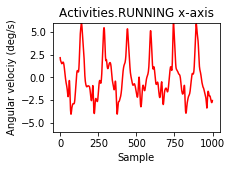

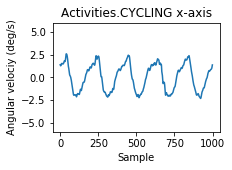

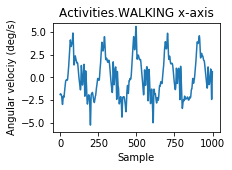

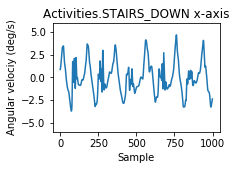

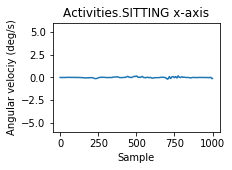

In [8]:
axis = 0
plt.plot(dataset[44][axis],'r')
plt.title(str(labels[44])+" x-axis")
plt.xlabel("Sample")
plt.ylabel("Angular velociy (deg/s)")
plt.ylim(-6,6)
plt.savefig("figures/raw_data_running.png", bbox_inches="tight")

plt.figure()
plt.title(str(labels[100])+" x-axis")
plt.plot(dataset[100][axis])
plt.xlabel("Sample")
plt.ylabel("Angular velociy (deg/s)")
plt.ylim(-6,6)
plt.savefig("figures/raw_data_cycling.png", bbox_inches="tight")

plt.figure()
plt.title(str(labels[250])+" x-axis")
plt.plot(dataset[250][axis])
plt.xlabel("Sample")
plt.ylabel("Angular velociy (deg/s)")
plt.ylim(-6,6)
plt.savefig("figures/raw_data_walking.png", bbox_inches="tight")

plt.figure()
plt.title(str(labels[410])+" x-axis")
plt.plot(dataset[410][axis])
plt.xlabel("Sample")
plt.ylabel("Angular velociy (deg/s)")
plt.ylim(-6,6)
plt.savefig("figures/raw_data_stairs.png", bbox_inches="tight")

plt.figure()
plt.title(str(labels[371])+" x-axis")
plt.plot(dataset[371][axis])
plt.xlabel("Sample")
plt.ylabel("Angular velociy (deg/s)")
plt.ylim(-6,6)
plt.savefig("figures/raw_data_sitting.png", bbox_inches="tight")

### Frequencies

Activities.WALKING
Average dominating frequency 1.1114666307404724
Minimum dominating frequency 0.0
Maximum dominating frequency 5.410821643286574
Variance dominating frequency: 0.5242784784197072
datasize: (119, 2)
Average amplitude 2.040745599728981
Variance amplitude: 0.4926051786758169

Activities.RUNNING
Average dominating frequency 1.4168688253700379
Minimum dominating frequency 1.0020040080160322
Maximum dominating frequency 4.008016032064129
Variance dominating frequency: 0.037496712826288255
datasize: (228, 2)
Average amplitude 2.5538878960540323
Variance amplitude: 0.3060026437255506

Activities.CYCLING
Average dominating frequency 0.8636742511571818
Minimum dominating frequency 0.0
Maximum dominating frequency 4.408817635270541
Variance dominating frequency: 0.23284524323280725
datasize: (226, 2)
Average amplitude 0.8329105908708518
Variance amplitude: 0.4255619775468929

Activities.SITTING
Average dominating frequency 2.65243129938037
Minimum dominating frequency 0.0
Maximu

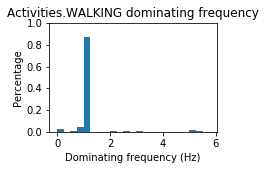

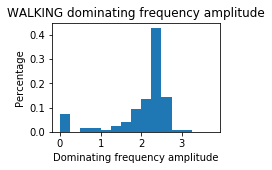

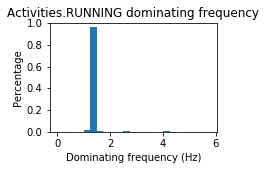

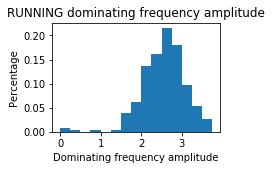

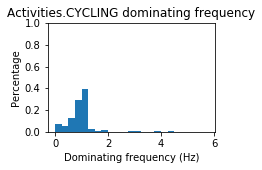

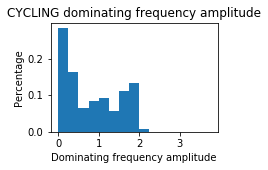

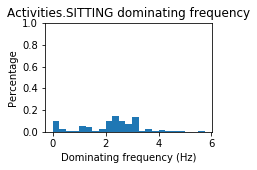

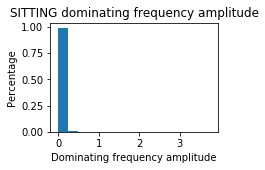

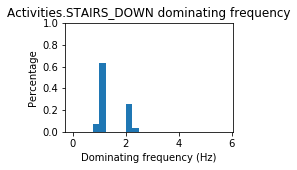

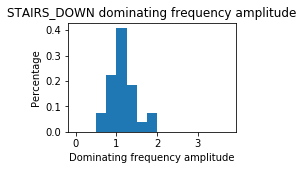

In [9]:
for key in dominating_frequency.keys():
    dominating_frequency[key] = np.array(dominating_frequency[key])
    print(key)
    print("Average dominating frequency", np.mean(dominating_frequency[key][:,0]))
    print("Minimum dominating frequency", np.min(dominating_frequency[key][:,0]))
    print("Maximum dominating frequency", np.max(dominating_frequency[key][:,0]))
    print("Variance dominating frequency:",np.var(dominating_frequency[key][:,0]))
    print("datasize:",dominating_frequency[key].shape)
    print("Average amplitude", np.average(dominating_frequency[key][:,1]))
    print("Variance amplitude:",np.var(dominating_frequency[key][:,1]))

    print()
    plt.figure()
    plt.title(str(key)+" dominating frequency")
    plt.hist(dominating_frequency[key][:,0], bins= np.arange(0,6,0.25), weights=np.ones(len(dominating_frequency[key][:,0])) / len(dominating_frequency[key][:,0]))
    plt.ylabel("Percentage")
    plt.xlabel("Dominating frequency (Hz)")
    plt.ylim(0,1)
    plt.savefig("figures/frequencies_"+str(key).split(".")[1]+".png", bbox_inches="tight")
    
    plt.figure()
    plt.title(str(key).split('.')[1]+" dominating frequency amplitude")
    plt.hist(dominating_frequency[key][:,1], bins= np.arange(0,4,0.25), weights=np.ones(len(dominating_frequency[key][:,1])) / len(dominating_frequency[key][:,1]))
    plt.ylabel("Percentage")
    plt.xlabel("Dominating frequency amplitude")
    plt.savefig("figures/frequencies_amplitude_"+str(key).split(".")[1]+".png", bbox_inches="tight")

### Plots in frequency domain

In [10]:
def plot_fft(data):
    yf = np.fft.fft(data)
    T = 1/200
    N = len(data)
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.xlim(0,5)
    plt.show()
    print(xf[np.argmax(np.abs(yf[:N//2]))])

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


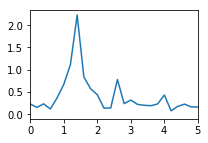

1.402805611222445


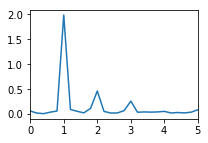

1.0020040080160322


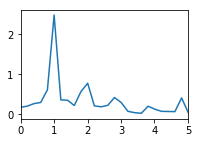

1.0020040080160322


In [11]:
plot_fft(dataset[44][0])
plot_fft(dataset[100][0])
plot_fft(dataset[250][0])